In [104]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


def fac(k):
    """returns k!"""
    if k < 2: return 1.
    return k * fac(k - 1)

def zernike_poly(Y, X, n, m):
    """calculates Zernike polynomial Z_nm and Z_n-m, saved in phasor
    
    Arguments:
    Y    :    y-coordinates in Euclidean space
    X    :    x-coordinates in Euclidean space
    n    :    Radial charge n
    m    :    Azimuthal charge m
    
    Returns:
    a+bi :    Z_nm + Z_n-m*i"""
    out = np.zeros(Y.size, dtype=complex)

    rho = np.sqrt(X**2 + Y**2) # define radial coordinate
    phasor = np.cos(m*np.arctan2(Y,X)) + 1.j * np.sin(m*np.arctan2(Y,X)) # phasor for m and -m azimuthal charges

    for k in range(int((n-m)//2) + 1): # loop over charge contribution
        out += (-1.)**k * fac(n-k)/(fac(k) * fac((n - 2*k + m) // 2) * fac((n - 2*k - m) // 2)) * rho**(n - 2*k) * phasor

    #out[abs(out) > 1] = 0 # I am cheating here! 
    return out

def zernike_reconstruct(img, radius, n_max, center, save_coeffs=False):
    """reconstructs an image using Zernike moments
    
    Arguments:
    img   :    image to reconstruct
    radius:    radius of disk to fit with Zernikes, in pixel units
    n_max :    maximum Radial charge used in reconstruction
    center:    center of disk to fit with Zernikes, in pixel coordinates
    
    Returns:
    a     :    Reconstruction of img with n_max charges"""
    
    shape = img.shape
    Y, X = np.mgrid[:shape[0], :shape[1]] # get coordinates
    Yc = ((Y - center[0]) / radius).ravel() # normalize coordinates
    Xc = ((X - center[1]) / radius).ravel()
    
    in_circle = (Yc**2 + Xc**2)**.5 < 1. # set unit disk
    
    data = img.ravel()[in_circle] # get data in unit disk
    
    reconstruction = np.zeros(img.size, dtype=complex) # instatiate memory
    intermediate = np.zeros(in_circle.sum(), dtype=complex) # instatiate memory
    
    npix = in_circle.sum() # calculate normalization
    
    coeffs = {}
    for n in range(n_max+1):
        for m in range(n+1):
            if (n-m)%2 == 0:
                Z = zernike_poly(Yc[in_circle], Xc[in_circle], n, m) # get Zernike
                a = sum(data * np.conjugate(Z)) * (n + 1)/npix # calculate Zernike moment
                intermediate += a * Z # add to accumulator
                if save_coeffs:
                    coeffs[(n, m)] = a.real
                    if m != 0: coeffs[(n, -m)] = a.imag
    
    reconstruction[in_circle] = intermediate
    return reconstruction.real, coeffs


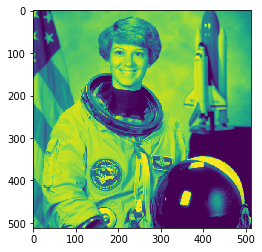

In [25]:
from astropy.io import fits
image = fits.getdata('eileencollins.fits')
plt.imshow(image)
plt.show()

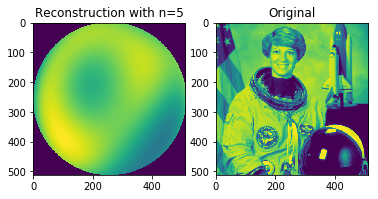

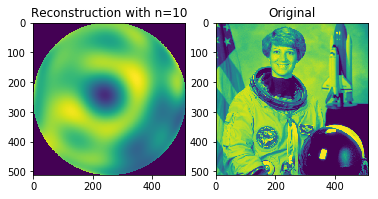

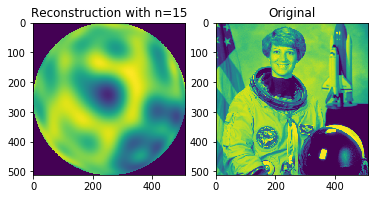

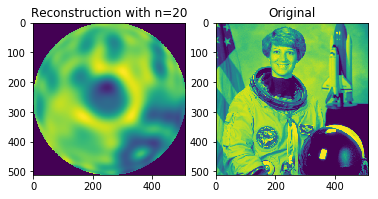

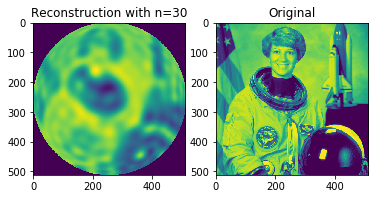

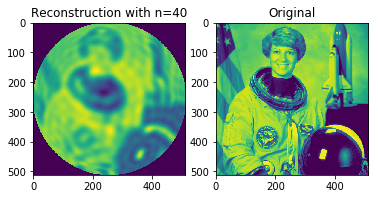

In [48]:
N=5
reconstruction5, coeffs5 = zernike_reconstruct(image, 256, N, (256,256), True)
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(reconstruction5.reshape(image.shape))
ax1.set_title('Reconstruction with n=5')
ax2.imshow(image)
ax2.set_title('Original')
plt.show()

N=10
reconstruction10, coeffs10 = zernike_reconstruct(image, 256, N, (256,256), True)
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(reconstruction10.reshape(image.shape))
ax1.set_title('Reconstruction with n=10')
ax2.imshow(image)
ax2.set_title('Original')
plt.show()

N=15
reconstruction15, coeffs15 = zernike_reconstruct(image, 256, N, (256,256), True)
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(reconstruction15.reshape(image.shape))
ax1.set_title('Reconstruction with n=15')
ax2.imshow(image)
ax2.set_title('Original')
plt.show()

N=20
reconstruction20, coeffs20 = zernike_reconstruct(image, 256, N, (256,256), True)
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(reconstruction20.reshape(image.shape))
ax1.set_title('Reconstruction with n=20')
ax2.imshow(image)
ax2.set_title('Original')
plt.show()

N=30
reconstruction30, coeffs30 = zernike_reconstruct(image, 256, N, (256,256), True)
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(reconstruction30.reshape(image.shape))
ax1.set_title('Reconstruction with n=30')
ax2.imshow(image)
ax2.set_title('Original')
plt.show()

N=40
reconstruction40, coeffs40 = zernike_reconstruct(image, 256, N, (256,256), True)
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(reconstruction40.reshape(image.shape))
ax1.set_title('Reconstruction with n=40')
ax2.imshow(image)
ax2.set_title('Original')
plt.show()

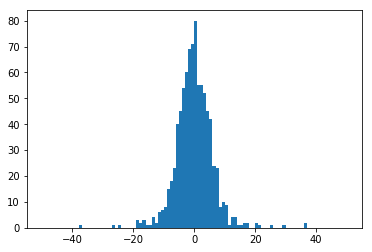

In [98]:
plt.hist(coeffs40.values(), bins=100, range=(-50,50));

In [106]:
np.ndarray.__dict__

mappingproxy({'__repr__': <slot wrapper '__repr__' of 'numpy.ndarray' objects>,
              '__hash__': None,
              '__str__': <slot wrapper '__str__' of 'numpy.ndarray' objects>,
              '__lt__': <slot wrapper '__lt__' of 'numpy.ndarray' objects>,
              '__le__': <slot wrapper '__le__' of 'numpy.ndarray' objects>,
              '__eq__': <slot wrapper '__eq__' of 'numpy.ndarray' objects>,
              '__ne__': <slot wrapper '__ne__' of 'numpy.ndarray' objects>,
              '__gt__': <slot wrapper '__gt__' of 'numpy.ndarray' objects>,
              '__ge__': <slot wrapper '__ge__' of 'numpy.ndarray' objects>,
              '__iter__': <slot wrapper '__iter__' of 'numpy.ndarray' objects>,
              '__add__': <slot wrapper '__add__' of 'numpy.ndarray' objects>,
              '__radd__': <slot wrapper '__radd__' of 'numpy.ndarray' objects>,
              '__sub__': <slot wrapper '__sub__' of 'numpy.ndarray' objects>,
              '__rsub__': <slot wrappe

In [107]:
len(coeffs40.keys())

861